In [ ]:
#attempting to run a multilinear model

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [155]:
X_train = pd.read_csv("../Caroline/X_train42.csv")
y_train = pd.read_csv("../Caroline/y_train42.csv")
X_test = pd.read_csv("../Caroline/X_test42.csv")
y_test = pd.read_csv("../Caroline/y_test42.csv")

In [156]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [157]:
ols.fit(X_train, y_train)

LinearRegression()

In [158]:
ols.score(X_train, y_train)

0.9371207742775771

In [159]:
ols.score(X_test, y_test)

0.9182864163090958

In [160]:
y_train

,SalePrice
0,118500
1,157000
2,254900
3,84500
4,174500
...,...
2041,165000
2042,76000
2043,114500
2044,163000


In [161]:
print(len(pd.DataFrame(ols.coef_).transpose()))
len(X_train.columns.tolist())

230


230

In [162]:
colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
#result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
GrLivArea,36.246478
LotFrontage,5.954778
LotArea,0.655625
OverallQual,7130.373381
OverallCond,6141.413684
...,...
SaleCondition__Abnorml,-2812.608045
SaleCondition__AdjLand,-2692.953293
SaleCondition__Alloca,9878.390215
SaleCondition__Family,-6906.870939


In [163]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

#Royce says use Lasso to see which coefficients go down to 0 instead of selecting by p value

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        20:02:25   Log-Likelihood:                -23043.
No. Observations:                2046   AIC:                         4.653e+04
Df Residuals:                    1824   BIC:                         4.778e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.71

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Lasso

In [164]:
#helpful website
# https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#first need to scale! I don't think joaquin's model scaled

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)


In [166]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split

#not sure how to do this

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# lasso_alphas = np.linspace(0, 0.2, 21)
# lasso = Lasso()
# grid = dict()
# grid['alpha'] = lasso_alphas
# gscv = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# results = gscv.fit(X_train_scaled, y_train)
# print('MAE: %.5f' % results.best_score_)
# print('Config: %s' % results.best_params_)

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333404440648.225, tolerance: 1054419832.3736948
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326334270108.06366, tolerance: 1044787361.2478063
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310448568125.7391, tolerance: 1028366887.840753
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyth

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326801234397.6777, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330519498558.59985, tolerance: 1048732515.4688262
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334515264290.11615, tolerance: 1053799586.4134442
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/p

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316156342449.895, tolerance: 1050184042.9622049
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318685329714.35565, tolerance: 1036424683.7851509
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325167399816.9609, tolerance: 1010608984.5415325
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/pyt

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305252410158.11584, tolerance: 1005504806.5176598
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251123271586.5057, tolerance: 1049263742.8807616
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306061741317.2645, tolerance: 1050184042.9622049
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239037275842.97162, tolerance: 1049263742.8807616
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295809290363.14197, tolerance: 1050184042.9622049
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276980342735.01154, tolerance: 1048912494.5606676
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265643244422.8076, tolerance: 1063006280.4899575
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246137779003.66916, tolerance: 1047703364.6238551
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241374599810.13123, tolerance: 990929206.4557858
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/py

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251791035803.15796, tolerance: 1063006280.4899575
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298768508995.99817, tolerance: 1080906040.3812797
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239129419853.42422, tolerance: 1047703364.6238551
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306847673573.08624, tolerance: 1044787361.2478063
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242018667999.59753, tolerance: 1005111048.6330165
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260581927660.59906, tolerance: 1052080099.4676436
  model = cd_fast.enet_coordinate_descent(
/Users/carolinekeough/opt/anaconda3/lib/

KeyboardInterrupt: 

In [ ]:
#could use geopy on the combo csvs and map like the highest sale prices or something


In [167]:
ridge = Ridge()
lasso = Lasso()

In [168]:
#Looking at lecture code
ridge.set_params(max_iter = 10000, normalize=True)
lasso.set_params(max_iter = 10000, normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 10, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [169]:
max_index = list(lasso_scores_test).index(max(lasso_scores_test))
alphas[max_index]

3.1381818181818177

Text(0, 0.5, '$R^2$')

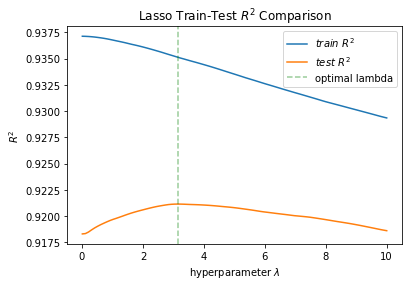

In [172]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [173]:
lasso.set_params(alpha=alphas[max_index], normalize = True)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

#So this model is slightly better than MLR

0.9351268272163544


0.9211475146180282

In [174]:
optimal_coefs = lasso.coef_.reshape(1,230)

In [175]:
coefs_lasso = pd.DataFrame(optimal_coefs, columns = X_train.columns)  
coefs_lasso.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,57.848305,10.094066,0.608091,7548.783706,5865.550522,401.939559,28.108922,11.35646,-342.28316,2.229687,...,0.0,-4843.636799,0.0,-9547.535825,-0.0,-1522.335783,-2895.882877,5896.072585,-8204.61863,6987.821785


In [176]:
coefs_lasso == 0

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


In [177]:
to_drop = coefs_lasso.columns[(coefs_lasso == 0).all()]

In [178]:
to_drop


Index(['FullBath', 'TotRmsAbvGrd', 'Fence', 'MSSubClass__40', 'MSSubClass__45',
       'MSSubClass__50', 'MSSubClass__70', 'MSSubClass__85', 'MSSubClass__180',
       'MSZoning__A (agr)', 'MSZoning__I (all)', 'MSZoning__RH',
       'LotConfig__Corner', 'Neighborhood__Mitchel', 'Neighborhood__OldTown',
       'Neighborhood__SawyerW', 'Neighborhood__Timber', 'Condition1__PosN',
       'Condition2__Artery', 'Condition2__RRAn', 'BldgType__2fmCon',
       'BldgType__Duplex', 'HouseStyle__2Story', 'HouseStyle__SLvl',
       'RoofStyle__Hip', 'Exterior1st__AsbShng', 'Exterior1st__AsphShn',
       'Exterior1st__BrkComm', 'Exterior1st__MetalSd', 'Exterior1st__Plywood',
       'Exterior1st__Stucco', 'Exterior2nd__Brk Cmn', 'Exterior2nd__CBlock',
       'Exterior2nd__PreCast', 'Exterior2nd__Stone', 'Exterior2nd__Wd Sdng',
       'Foundation__BrkTil', 'Foundation__Slab', 'BsmtCond__Gd',
       'BsmtCond__NA', 'BsmtCond__Po', 'BsmtExposure__NA', 'HeatingQC__Po',
       'Electrical__FuseA', 'Electri

In [179]:
#Now should go through these items and see what the deal is. Are they just items that had very few houses matching?
#cant just drop cols ?

Ridge

In [ ]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [ ]:
#Pretty bad r2 not even gonna look at what it is at the intersection

max(ridge_scores_test)



Elastic Net

In [ ]:
elasticnet = ElasticNet()

In [ ]:
#Doesn't converge idk

N_alpha = 100
N_rho   = 10
alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
train_scores     = np.zeros((N_rho, N_alpha))
test_scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            elasticnet.set_params(max_iter = 30000, alpha=alpha, l1_ratio=rho)
            elasticnet.fit(X_train, y_train)
            train_scores[rhoIdx, alphaIdx] = elasticnet.score(X_train, y_train)   
            elasticnet.fit(X_test, y_test)
            test_scores[rhoIdx, alphaIdx] = elasticnet.score(X_test, y_test)   

In [ ]:
#joaquin's lasso didn't normalize and had a better R2
#try that too
#try log transform



Lasso and Ridge, not normalized

In [ ]:
#Looking at lecture code
ridge.set_params(max_iter = 100000, normalize=False)
lasso.set_params(max_iter = 100000, normalize=False)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 20, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [140]:
max_index = list(lasso_scores_test).index(max(lasso_scores_test))
print(max(lasso_scores_test))
alphas[max_index]

0.9224049704264469


18.182727272727274

In [ ]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [129]:
#So actually not normalizing gives a slightly better R2
best_r2 = max(lasso_scores_test)
best_r2

18.182727272727274

In [131]:
best_lasso = Lasso()
best_lasso.set_params(alpha = alphas[max_index], normalize = False, max_iter = 100000)
best_lasso.fit(X_train, y_train)
best_lasso.score(X_test, y_test)
best_lasso.coef_

array([ 3.67994545e+01,  1.67033199e+01,  6.21150250e-01,  7.62228804e+03,
        6.28027394e+03,  4.43204046e+02,  2.93416874e+01,  1.44548095e+01,
       -1.10484145e+03,  2.24683336e+01,  2.77166738e+01,  1.93727466e+03,
       -4.16597731e+02,  7.65741931e+01,  9.29316156e+02, -4.90575824e+03,
       -1.05048637e+04,  4.94582361e+01,  2.53668604e+03,  7.78328314e+03,
        8.65385298e+00, -1.01384823e+01,  1.25398449e+01, -7.19115395e+00,
        2.45117418e+01,  0.00000000e+00, -3.53213417e+02,  5.48758579e+02,
        3.07313331e+01,  2.39015400e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.38189059e+03,  6.87953637e+02,  6.76234586e+03,
       -3.57727902e+03, -0.00000000e+00, -1.41657545e+04, -2.59242238e+03,
       -1.33873807e+04, -0.00000000e+00, -3.20467705e+03,  0.00000000e+00,
       -1.24960422e+04, -7.40486924e+03,  0.00000000e+00, -0.00000000e+00,
       -7.10367478e+03, -1.57685029e+03,  3.40398394e+03, -4.94351193e+03,
       -8.44978623e+03,  

In [139]:
#lets see what variables remain

best_coefs_lasso = pd.DataFrame(best_lasso.coef_.reshape(1,230), columns = X_train.columns)  
best_coefs_lasso
len(best_coefs_lasso.columns[(best_coefs_lasso != 0).all()])
#brings us down to 171 columns lol. Probably EDA should focus on info in those?

171

Lasso not normalized, log transform. Ok so I don't think that's how you're supposed to do it. Probs need to transform the data before finding alpha.

In [143]:
# log y lasso model
log_lasso = Lasso()
log_lasso.set_params(alpha = alphas[max_index])
log_lasso.fit(X_train, np.log(y_train))
print('Train R2: ', log_lasso.score(X_train, np.log(y_train)))
print('Test R2: ', log_lasso.score(X_test, np.log(y_test)))

Train R2:  0.6203498438765596
Test R2:  0.6169216092892774


Ridge not normalized

In [ ]:
max_index = list(ridge_scores_test).index(max(ridge_scores_test))
alphas[max_index]

In [ ]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Ridge Train-Test $R^2$ Comparison')
# ridge_underfit = ridge_scores_train < ridge_scores_test
# last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(alphas[max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [ ]:
max(ridge_scores_test)

Log MLR

In [147]:
log_ols = linear_model.LinearRegression()
log_ols.fit(X_train, np.log(y_train))
print('Train R2: ', log_ols.score(X_train, np.log(y_train)))
print('Test R2: ', log_ols.score(X_test, np.log(y_test)))

#ok now this beats our lasso model!!

Train R2:  0.9418013723456785
Test R2:  0.9231511364639096


Lasso/Ridge Log transform... I guess normalized?

In [228]:
#Looking at lecture code
#SOS. I am def doing something wrong here, cuz train r2 are basically all 0
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

log_ridge = Ridge()
log_lasso = Lasso()
log_ridge.set_params(max_iter = 10000, normalize=True)
log_lasso.set_params(max_iter = 10000, normalize=True)
log_ridge_scores_train = []
log_lasso_scores_train = []
log_ridge_scores_test  = []
log_lasso_scores_test  = []

alphas = np.linspace(-.1, 5, 100)

for alpha in alphas:
            log_ridge.set_params(alpha=alpha)
            log_lasso.set_params(alpha=alpha)
            log_ridge.fit(X_train, log_y_train)
            log_lasso.fit(X_train, log_y_train)
            log_ridge_scores_train.append(log_ridge.score(X_train, log_y_train))
            log_ridge_scores_test.append(log_ridge.score(X_test, log_y_test))
            log_lasso_scores_train.append(log_lasso.score(X_train, log_y_train))
            log_lasso_scores_test.append(log_lasso.score(X_test, log_y_test))
log_ridge_scores_train = np.array(log_ridge_scores_train) 
log_ridge_scores_test  = np.array(log_ridge_scores_test)
log_lasso_scores_train = np.array(log_lasso_scores_train) 
log_lasso_scores_test  = np.array(log_lasso_scores_test)

In [229]:
log_max_index = list(log_lasso_scores_test).index(max(log_lasso_scores_test))
print(max(log_lasso_scores_test))
alphas[log_max_index]

0.6246119088483657


0.003030303030303022

Text(0, 0.5, '$R^2$')

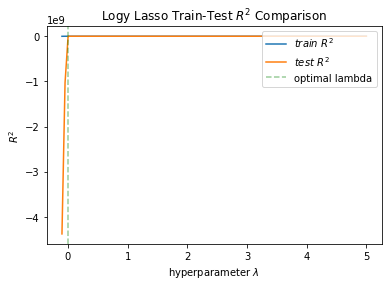

In [230]:
#Lol sos
plt.plot(alphas, log_lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, log_lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Logy Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[log_max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [231]:
#wait how tf is the test r2 when lambda = 0 lower than the olm model. shouldn't it be the same.
#for some reason looks like ridge is working but not lasso???

In [232]:
log_max_index = list(log_ridge_scores_test).index(max(log_ridge_scores_test))
print(max(log_ridge_scores_test))
alphas[log_max_index]

0.9270662693274109


0.10606060606060605

array([0.78640814, 0.74271336, 0.94177808, 0.94018538, 0.93838464,
       0.93661344, 0.93487136, 0.93315359, 0.93145651, 0.92977721,
       0.92811318, 0.92646227, 0.92482255, 0.92319238, 0.92157031,
       0.91995508, 0.91834564, 0.91674105, 0.91514053, 0.91354339,
       0.91194906, 0.91035706, 0.90876696, 0.90717842, 0.90559113,
       0.90400486, 0.9024194 , 0.90083459, 0.89925028, 0.89766637,
       0.89608278, 0.89449945, 0.89291632, 0.89133339, 0.88975062,
       0.88816803, 0.88658561, 0.88500339, 0.8834214 , 0.88183966,
       0.88025822, 0.87867711, 0.8770964 , 0.87551613, 0.87393635,
       0.87235713, 0.87077853, 0.8692006 , 0.86762341, 0.86604702,
       0.8644715 , 0.86289692, 0.86132333, 0.85975081, 0.85817943,
       0.85660924, 0.85504031, 0.85347271, 0.8519065 , 0.85034175,
       0.84877852, 0.84721687, 0.84565686, 0.84409855, 0.842542  ,
       0.84098728, 0.83943443, 0.83788351, 0.83633458, 0.83478769,
       0.8332429 , 0.83170025, 0.8301598 , 0.8286216 , 0.82708

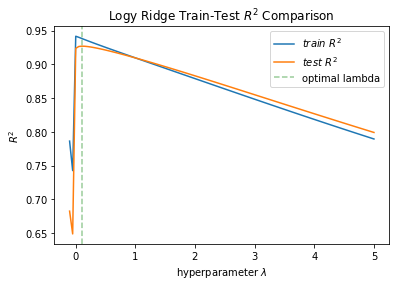

In [233]:
#Lol sos
plt.plot(alphas, log_ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, log_ridge_scores_test, label=r'$test\ R^2$')
plt.title(r'Logy Ridge Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(alphas[log_max_index], linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')


In [ ]:
#omg what does it mean